In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
plt.style.use('fivethirtyeight')
import seaborn as sns

## Loading dataset

In [2]:
# Usgs Earthquake Dataset
df = pd.read_csv("/work/earthquake_data.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2000-01-04T14:45:55.970Z,40.136,72.131,33.0,4.4,mb,NaN,NaN,NaN,0.76,...,2014-11-07T01:09:17.150Z,"13 km S of Kyzyl-Kyya, Kyrgyzstan",earthquake,NaN,NaN,NaN,7.0,reviewed,us,us
1,2000-01-06T20:55:31.850Z,38.002,78.077,33.0,4.1,mb,NaN,NaN,NaN,1.43,...,2014-11-07T01:09:18.003Z,"86 km ESE of Shache, China",earthquake,NaN,NaN,NaN,2.0,reviewed,us,us
2,2000-01-16T02:46:57.750Z,39.196,76.870,100.2,3.8,mb,NaN,NaN,NaN,1.24,...,2014-11-07T01:09:19.860Z,"81 km ESE of Kashgar, China",earthquake,NaN,13.6,NaN,4.0,reviewed,us,us
3,2000-01-16T07:10:47.470Z,39.300,76.708,104.6,4.3,mb,NaN,NaN,NaN,1.55,...,2014-11-07T01:09:19.873Z,"southern Xinjiang, China",earthquake,NaN,13.2,NaN,12.0,reviewed,us,us
4,2000-01-19T21:39:32.410Z,38.570,72.968,89.6,3.7,mb,NaN,NaN,NaN,0.72,...,2014-11-07T01:09:20.810Z,"97 km WNW of Murghob, Tajikistan",earthquake,NaN,19.2,NaN,3.0,reviewed,us,us


## General info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4397 entries, 0 to 4396
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             4397 non-null   object 
 1   latitude         4397 non-null   float64
 2   longitude        4397 non-null   float64
 3   depth            4397 non-null   float64
 4   mag              4397 non-null   float64
 5   magType          3945 non-null   object 
 6   nst              3017 non-null   float64
 7   gap              3999 non-null   float64
 8   dmin             2017 non-null   float64
 9   rms              4391 non-null   float64
 10  net              4397 non-null   object 
 11  id               4397 non-null   object 
 12  updated          4397 non-null   object 
 13  place            4397 non-null   object 
 14  type             4397 non-null   object 
 15  horizontalError  1904 non-null   float64
 16  depthError       3201 non-null   float64
 17  magError      

In [4]:
df.shape

(4397, 22)

## Data Preprocessing

In [5]:
# All columns 
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
# Deleting not necessary columns
columns_to_drop = [
    'nst', 'gap', 'dmin', 'net', 'id', 'updated', 'type',
    'horizontalError', 'magError', 'status', 'locationSource', 'magSource'
]
df = df.drop(columns=columns_to_drop, axis=1)
df.head()

,time,latitude,longitude,depth,mag,magType,rms,place,depthError,magNst
0,2000-01-04T14:45:55.970Z,40.136,72.131,33.0,4.4,mb,0.76,"13 km S of Kyzyl-Kyya, Kyrgyzstan",NaN,7.0
1,2000-01-06T20:55:31.850Z,38.002,78.077,33.0,4.1,mb,1.43,"86 km ESE of Shache, China",NaN,2.0
2,2000-01-16T02:46:57.750Z,39.196,76.870,100.2,3.8,mb,1.24,"81 km ESE of Kashgar, China",13.6,4.0
3,2000-01-16T07:10:47.470Z,39.300,76.708,104.6,4.3,mb,1.55,"southern Xinjiang, China",13.2,12.0
4,2000-01-19T21:39:32.410Z,38.570,72.968,89.6,3.7,mb,0.72,"97 km WNW of Murghob, Tajikistan",19.2,3.0


In [7]:
# Left columns
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'rms',
       'place', 'depthError', 'magNst'],
      dtype='object')

In [8]:
# Checking missing values
df.isnull().sum()

time             0
latitude         0
longitude        0
depth            0
mag              0
magType        452
rms              6
place            0
depthError    1196
magNst         643
dtype: int64

In [9]:
# Filling missing values
df['rms'].fillna(df['rms'].mean(), inplace=True)
df['depthError'].fillna(df['depthError'].mean(), inplace=True)
df['magNst'].fillna(df['magNst'].mean(), inplace=True)

In [10]:
# Filtering magnitude
df = df[df['mag'] > 0]

In [11]:
# Adding year column
df['year'] = pd.DatetimeIndex(df['time']).year

In [12]:
# Adding magnitude category column
df['mag_category'] = pd.cut(df['mag'], bins=[0, 4, 5, 10], labels=['Minor', 'Moderate', 'Strong'])

In [13]:
# Adding season column
df['season'] = pd.to_datetime(df['time']).dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Autumn')))

In [14]:
# Handling duplicates
print(f'Number of duplicates: {df.duplicated().sum()}')
df = df.drop_duplicates()

Number of duplicates: 0


## Data analysis and Visualization

### Definitions of Variables

1. time: The exact date and time (UTC) when the earthquake occurred

2. latitude: The geographic latitude of the earthquake’s epicenter in degrees

3. longitude: The geographic longitude of the earthquake’s epicenter in degrees

4. depth: The depth of the earthquake’s hypocenter below the Earth’s surface in kilometers (km). Shallow: <70 km, Intermediate: 70–300 km, Deep: >300 km.

5. mag: The magnitude of the earthquake, measuring energy released

6. magType: The method used to calculate magnitude (e.g., "mb" for body-wave magnitude, "mw" for moment magnitude).

7. rms: Root mean square residual (seconds), measuring the fit of the seismic model to observed data. Lower values indicate better data quality

8. place: A text description of the earthquake’s location, often including distance and direction from a landmark

9. depthError: The uncertainty in the depth measurement (km), indicating location reliability.

10. magNst: The number of seismic stations used to calculate the magnitude.

In [15]:
# Summary statistics
df.describe()

,latitude,longitude,depth,mag,rms,depthError,magNst,year
count,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000,3945.000000
mean,39.321632,74.006579,54.522381,4.347503,0.925652,7.775484,20.789025,2012.915082
std,1.565425,3.368585,56.947007,0.405564,0.272251,6.464275,31.948261,7.575190
min,37.275300,65.323500,0.000000,3.000000,0.140000,0.000000,1.000000,2000.000000
25%,38.065000,71.853000,10.000000,4.100000,0.730000,2.000000,4.000000,2006.000000
50%,39.187000,73.283000,33.000000,4.300000,0.920000,8.100000,11.000000,2013.000000
75%,40.194000,75.955400,72.900000,4.500000,1.120000,8.600000,23.000000,2020.000000
max,44.316000,82.761600,285.700000,7.200000,1.920000,71.700000,541.000000,2025.000000


In [16]:
# Places with the most number of earthquakes
df['place'].value_counts().head(10)

place
southern Xinjiang, China                        24
Afghanistan-Tajikistan border region            19
Tajikistan-Xinjiang border region               16
Tajikistan                                      13
55 km E of Khorugh, Tajikistan                  13
Kyrgyzstan-Tajikistan-Xinjiang border region    11
128 km WNW of Aykol, China                      11
Kyrgyzstan                                       9
41 km ESE of Khorugh, Tajikistan                 9
39 km ESE of Khorugh, Tajikistan                 9
Name: count, dtype: int64

In [17]:
# Time range
print(df['time'].min())
print(df['time'].max())

2000-01-04T14:45:55.970Z
2025-04-15T15:07:40.217Z


In [18]:
# Max and min magnitude
print(df['mag'].max())
print(df['mag'].min())

7.2
3.0


In [19]:
# Number of earthquakes per year
df['year'].value_counts().sort_index()

year
2000    130
2001    108
2002    112
2003    198
2004    154
2005    123
2006    171
2007    182
2008    332
2009     69
2010     97
2011     89
2012     96
2013    118
2014    102
2015    179
2016    248
2017    156
2018    153
2019     97
2020    170
2021    137
2022    127
2023    194
2024    357
2025     46
Name: count, dtype: int64

In [20]:
# Major earthquakes
major_quakes = df[df['mag'] > 5.5]
print(f"Major earthquakes (M>5.5): {len(major_quakes)}")

Major earthquakes (M>5.5): 47


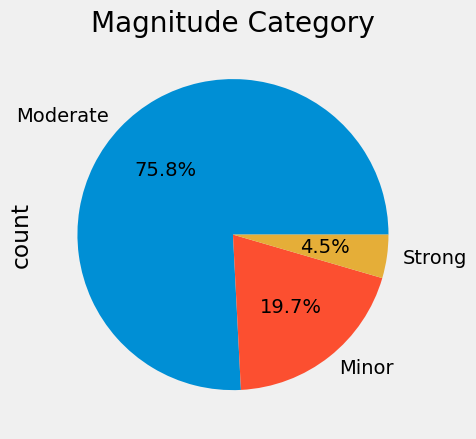

In [21]:
# Magnitude category
df['mag_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Magnitude Category')
plt.show()

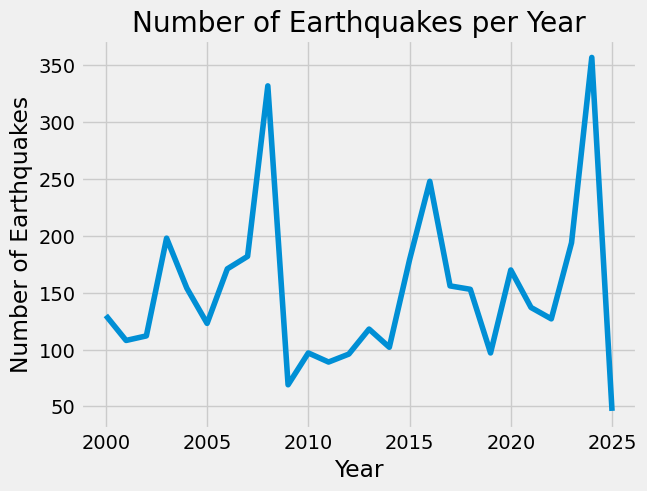

In [22]:
# Plot of number of earthquakes per year
df['year'].value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes per Year')
plt.show()

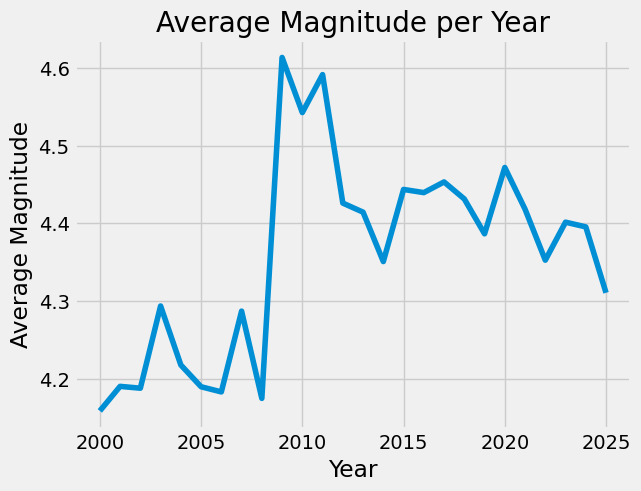

In [23]:
# Average magnitude per year
df.groupby('year')['mag'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.title('Average Magnitude per Year')
plt.show()

In [1]:
# Earthquake frequency by year
plt.figure(figsize=(9, 9))
df['year'].value_counts().sort_index().plot.barh()
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes per Year')
plt.show()

NameError: name 'plt' is not defined

In [25]:
# Origin of the earthquakes
df['origin'] = df['place'].apply(lambda x: x.split(',')[-1].strip())
df['origin'].value_counts().head(10)

origin
Tajikistan                                      1692
China                                            989
Kyrgyzstan                                       782
Afghanistan                                      192
Uzbekistan                                       109
Kazakhstan                                       103
Afghanistan-Tajikistan border region              19
Tajikistan-Xinjiang border region                 16
Kyrgyzstan-Tajikistan-Xinjiang border region      11
Kyrgyzstan-Tajikistan border region                8
Name: count, dtype: int64

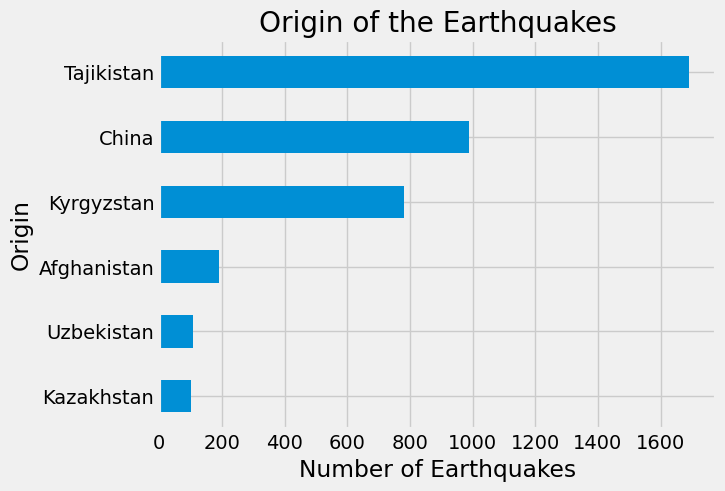

In [26]:
# Plot of origin of the earthquakes
df['origin'].value_counts().head(6).sort_values().plot.barh()
plt.xlabel('Number of Earthquakes')
plt.ylabel('Origin')
plt.title('Origin of the Earthquakes')
plt.show()

In [27]:
# Hypothesis: There is no correlation between magnitude and depth of the earthquake
correlation = df[['depth', 'mag']].corr()  
print(correlation)

          depth       mag
depth  1.000000 -0.212665
mag   -0.212665  1.000000


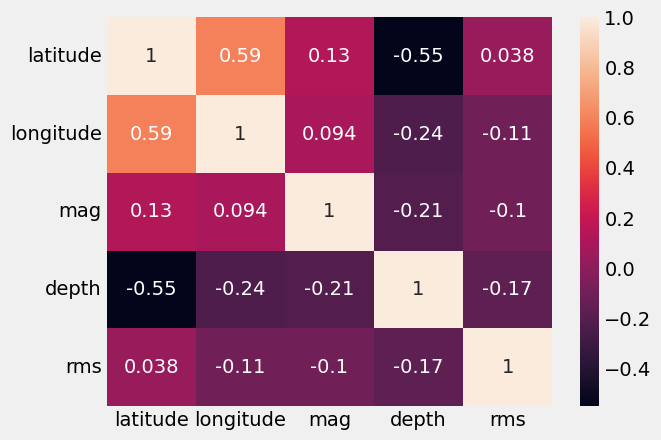

In [28]:
# Heatmap of data
heat_data = df[['latitude', 'longitude', 'mag', 'depth', 'rms']]
sns.heatmap(heat_data.corr(), annot=True)
plt.show()

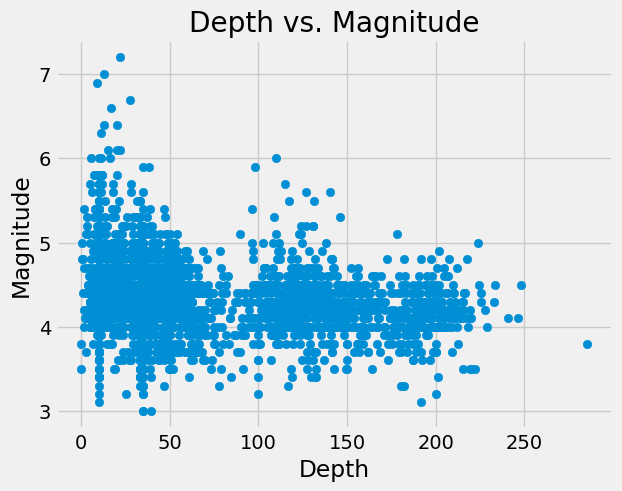

In [29]:
# Plot between depth and magnitude
plt.scatter(x='depth', y='mag', data=df)
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Depth vs. Magnitude')
plt.show()

In [30]:
# Magnitude value counts
df['mag'].value_counts().head(10)

mag
4.4    514
4.3    490
4.5    415
4.2    401
4.1    392
4.0    305
4.6    289
4.7    183
3.9    121
4.8    121
Name: count, dtype: int64

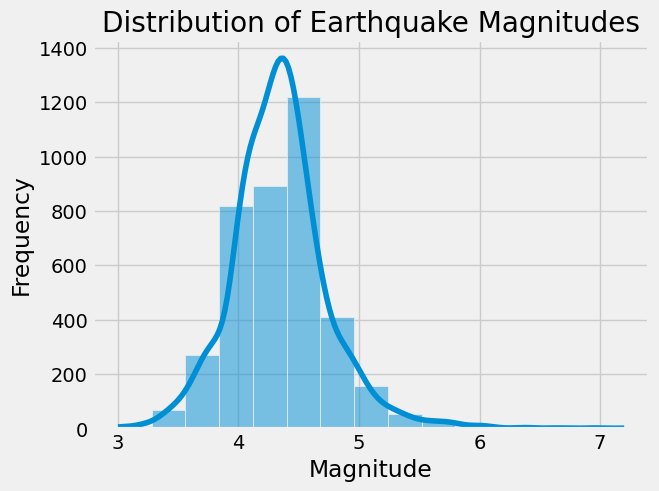

In [31]:
# Plot magnitude distribution
sns.histplot(df['mag'], bins=15, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

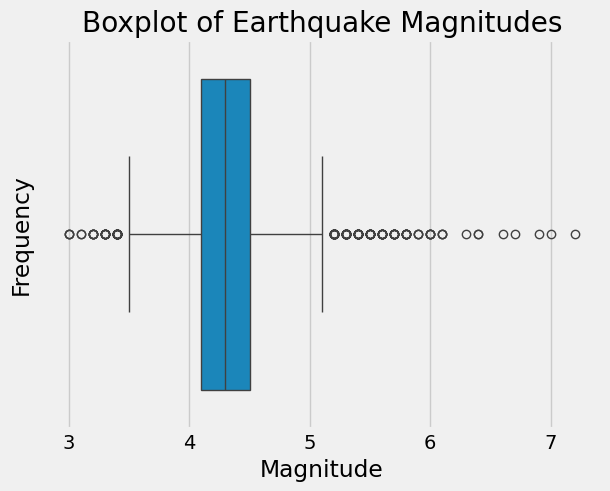

In [32]:
# Boxplot of magnitude
sns.boxplot(x='mag', data=df)
plt.title('Boxplot of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

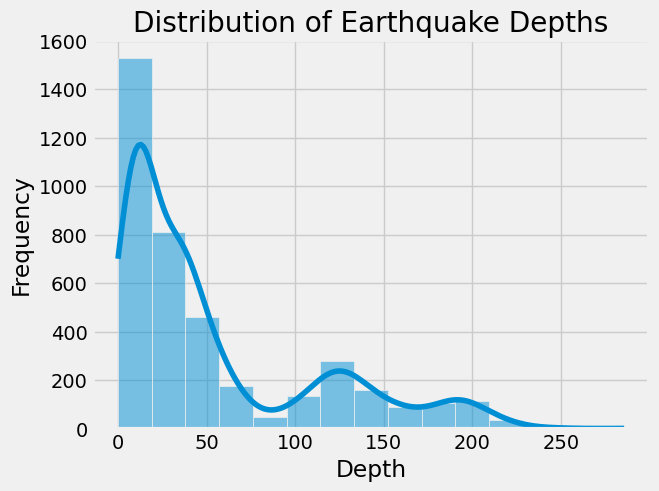

In [33]:
# Depth distribution
sns.histplot(df['depth'], bins=15, kde=True)
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()

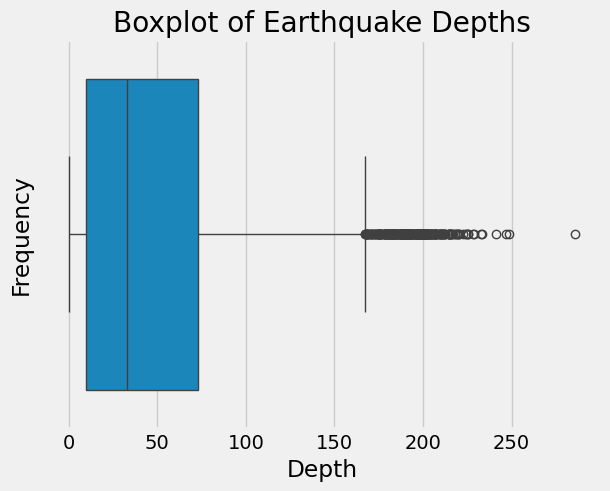

In [34]:
# Boxplot of depth
sns.boxplot(x='depth', data=df)
plt.title('Boxplot of Earthquake Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()

In [35]:
import folium
from folium.plugins import HeatMap
import plotly.express as px
from datetime import datetime

In [36]:
df.head()

,time,latitude,longitude,depth,mag,magType,rms,place,depthError,magNst,year,mag_category,season,origin
0,2000-01-04T14:45:55.970Z,40.136,72.131,33.0,4.4,mb,0.76,"13 km S of Kyzyl-Kyya, Kyrgyzstan",8.137638,7.0,2000,Moderate,Winter,Kyrgyzstan
1,2000-01-06T20:55:31.850Z,38.002,78.077,33.0,4.1,mb,1.43,"86 km ESE of Shache, China",8.137638,2.0,2000,Moderate,Winter,China
2,2000-01-16T02:46:57.750Z,39.196,76.870,100.2,3.8,mb,1.24,"81 km ESE of Kashgar, China",13.600000,4.0,2000,Minor,Winter,China
3,2000-01-16T07:10:47.470Z,39.300,76.708,104.6,4.3,mb,1.55,"southern Xinjiang, China",13.200000,12.0,2000,Moderate,Winter,China
4,2000-01-19T21:39:32.410Z,38.570,72.968,89.6,3.7,mb,0.72,"97 km WNW of Murghob, Tajikistan",19.200000,3.0,2000,Minor,Winter,Tajikistan


In [37]:
!pip install statsmodels==0.14.4


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [38]:
#  Relationship between mag and (depth or rms)
import statsmodels.api as sm
X = df[['depth', 'rms']]
y = df['mag']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mag   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.11e-57
Time:                        18:25:56   Log-Likelihood:                -1905.7
No. Observations:                3945   AIC:                             3817.
Df Residuals:                    3942   BIC:                             3836.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6329      0.024    191.540      0.000       4.586       4.680
depth         -0.0017      0.000    -15.129      0.000      -0.002      -0.001
rms           -0.2092      0.023     -8.981      0.000      -0.255      -0.163
==============================================================================
Omnibus:                      635.394   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2455.239
Skew:                           0.760   Prob(JB):                         0.00
Kurtosis:                       6.553   Cond. No.                         417.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from scipy.stats import ttest_ind
mag_early = df[df['year'] < 2010]['mag']
mag_late = df[df['year'] >= 2010]['mag']
t_stat, p_val = ttest_ind(mag_early, mag_late)
print(f"T-test p-value: {p_val}")

T-test p-value: 3.952014036693226e-52


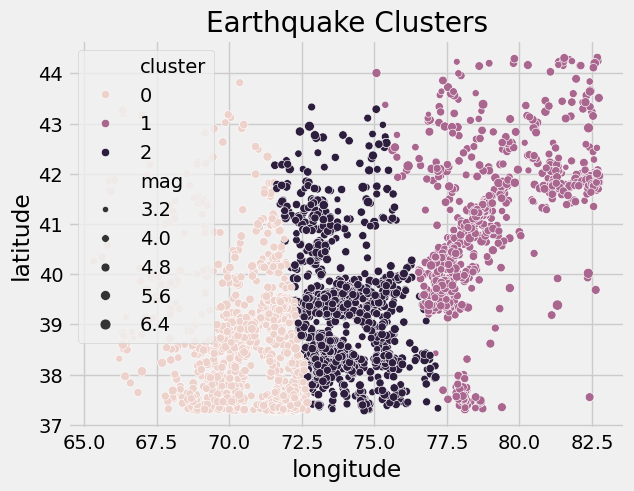

In [40]:
from sklearn.cluster import KMeans
X = df[['latitude', 'longitude', 'mag']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df['cluster'] = kmeans.labels_
sns.scatterplot(x='longitude', y='latitude', hue='cluster', size='mag', data=df)
plt.title('Earthquake Clusters')
plt.show()

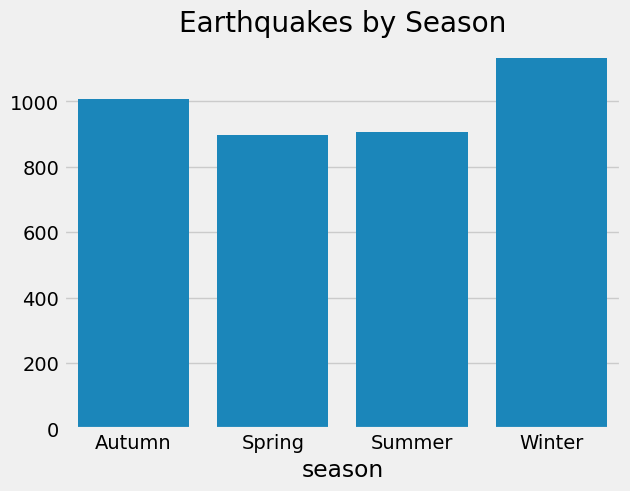

In [41]:
# Seasonal trends in earthquake frequency
season_counts = df.groupby('season').size()
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Earthquakes by Season')
plt.show()

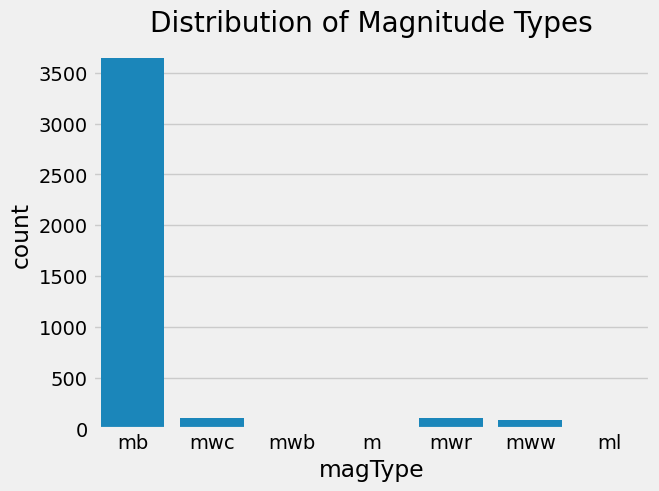

In [42]:
sns.countplot(x='magType', data=df)
plt.title('Distribution of Magnitude Types')
plt.show()

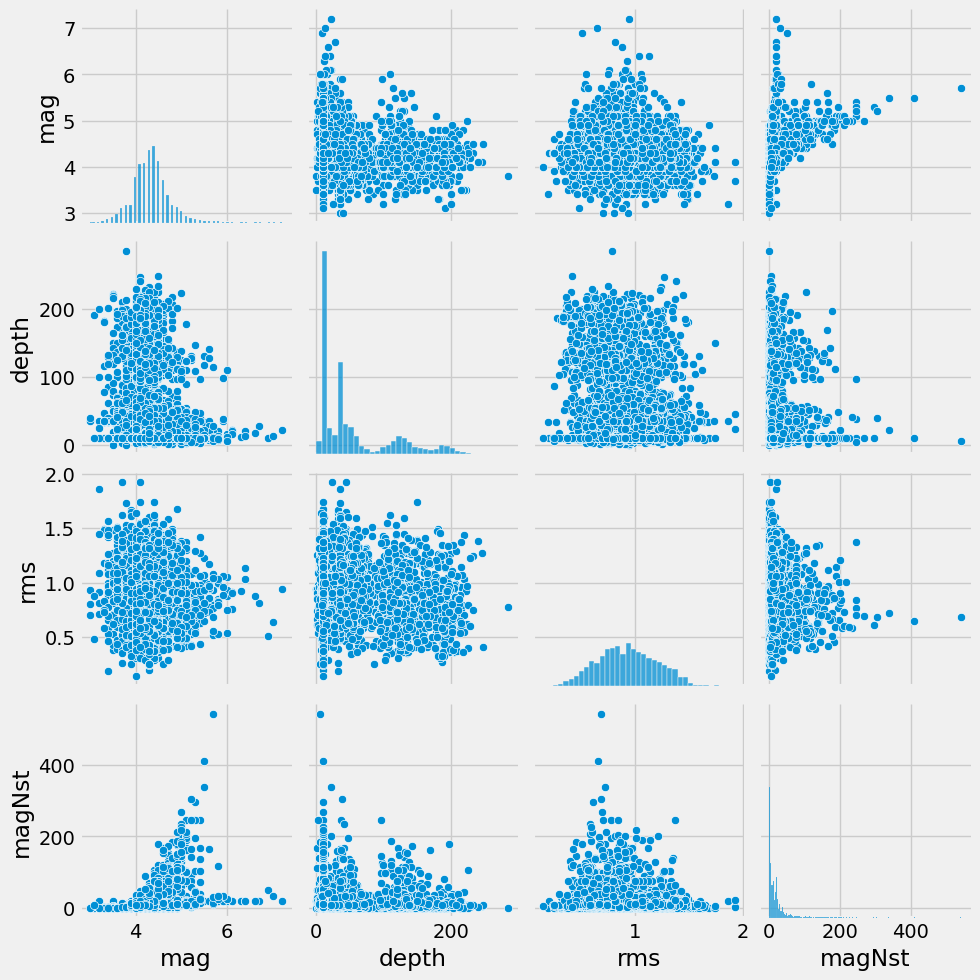

In [43]:
# Relationships between numerical variables
sns.pairplot(df[['mag', 'depth', 'rms', 'magNst']])
plt.show()

In [44]:
import plotly.express as px
fig = px.density_mapbox(df, lat='latitude', lon='longitude', z='mag', radius=10,
                        center=dict(lat=39.32, lon=74.01), zoom=5, mapbox_style='carto-positron')
fig.update_layout(title='Earthquake Density Heatmap')
fig.show()

/tmp/ipykernel_188/149790473.py:2: DeprecationWarning: *density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.density_mapbox(df, lat='latitude', lon='longitude', z='mag', radius=10,


In [45]:
map_kg = folium.Map(location=[41.2, 74.6], zoom_start=6)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map_kg)
map_kg

In [58]:
fig = px.scatter_mapbox(
    df, lat="latitude", lon="longitude", color="mag", size="mag",
    color_continuous_scale="Viridis", size_max=10, zoom=4,
    mapbox_style="carto-positron", title="Kyrgystan Earthquakes")
fig.show()

/tmp/ipykernel_188/3466546976.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

